In [4]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [5]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\a\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\a\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
csv_file_path = 'C:/Users/a/Downloads/part 2 cleaned dataset.csv'  # Replace with the actual file path
df = pd.read_csv(csv_file_path)

In [7]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [8]:
df.count()

Clothing ID                22641
Age                        22641
Title                      18958
Review Text                22641
Rating                     22641
Recommended IND            22641
Positive Feedback Count    22641
Division Name              22630
Department Name            22630
Class Name                 22630
dtype: int64

In [7]:
!pip install transformers
!pip install torch

In [2]:
from transformers import pipeline, BertTokenizer, BertForSequenceClassification

In [12]:
from wordcloud import WordCloud
from collections import Counter

In [9]:
# Load pre-trained BERT model and tokenizer
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# Define a function to get sentiment labels
def get_sentiment_label(text):
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class = logits.argmax().item()
    
    # Convert predicted class to sentiment label
    if predicted_class == 2:  # Neutral
        return 'Neutral'
    elif predicted_class > 2:  # Positive
        return 'Positive'
    else:  # Negative
        return 'Negative'

# Apply the sentiment analysis function to the 'Review Text' column
df['sentiment'] = df['Review Text'].apply(get_sentiment_label)

# Save the updated DataFrame to the same CSV file
df.to_csv(csv_file_path, index=False)

# Display the updated DataFrame with sentiment analysis results
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,sentiment
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Positive
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Positive
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Neutral
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,Positive
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Positive


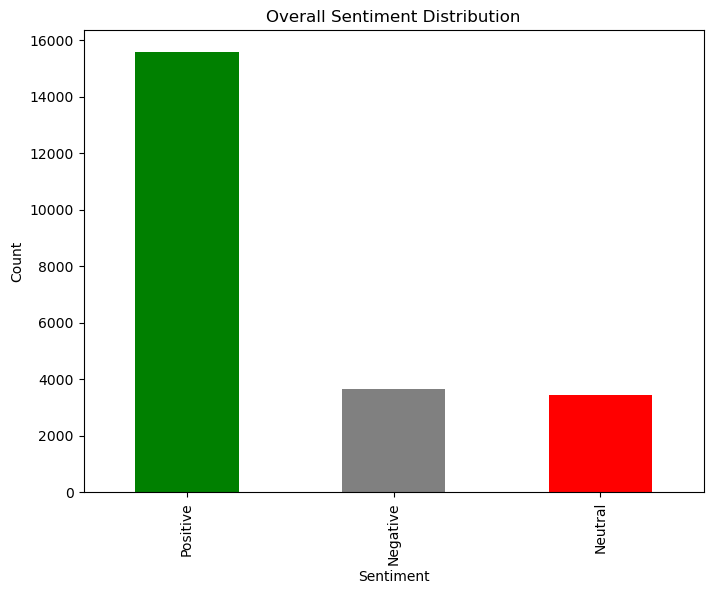

In [11]:
import matplotlib.pyplot as plt

# Assuming 'predicted_sentiment' column exists in your DataFrame
sentiment_distribution = df['sentiment'].value_counts()

# Plotting the sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_distribution.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

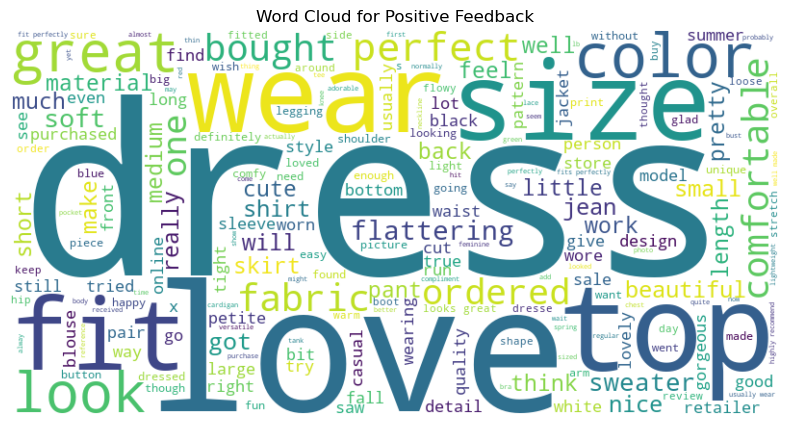

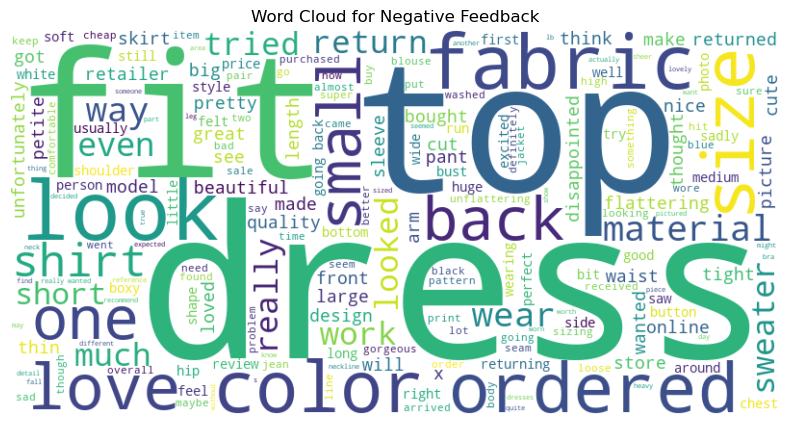

In [15]:
# Identify key themes in positive and negative feedback using word frequency analysis
positive_feedback = " ".join(df[df['sentiment'] == 'Positive']['Review Text'])
negative_feedback = " ".join(df[df['sentiment'] == 'Negative']['Review Text'])

# WordCloud for positive feedback
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_feedback)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Feedback')
plt.axis('off')
plt.show()

# WordCloud for negative feedback
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_feedback)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Feedback')
plt.axis('off')
plt.show()